## Predict whether the review given is positive or negative.

Analysis of the reviews and ratings user gives on Flipkart to make others aware of their experience and moreover about the quality of the product and brand. So, by analyzing that data we can tell the users a lot about the products and also the ways to enhance the quality of the product. 

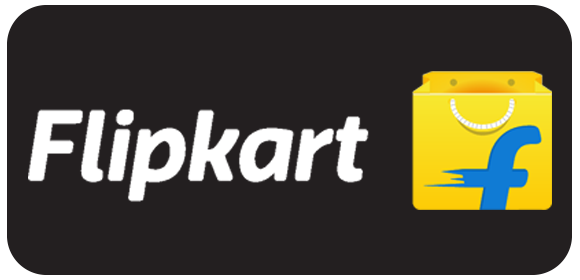

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the dataset
data = pd.read_csv('flipkart_data.csv')

In [3]:
# First five rows
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
# Shape of data
data.shape

(9976, 2)

In [5]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

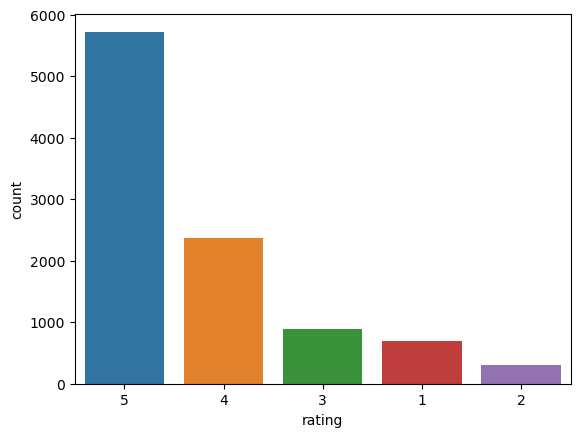

In [6]:
# Countplot for rating
sns.countplot(x='rating',order=data.rating.value_counts().index,data=data)

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1s category. For that the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1). 

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocessing and cleaning the reviews 

In [8]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >=5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)
data['label'] = pos_neg

In [9]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]','',sentence)
        
        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                         for token in nltk.word_tokenize(sentence)
                                         if token.lower() not in stopwords.words('english')))
    return preprocessed_text
        

In [10]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [01:32<00:00, 107.41it/s]


In [11]:
# After preprocessing
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


### Analysis of the Dataset

In [12]:
# check how many counts are there for positive and negative sentiments.
data['label'].value_counts()

1    5726
0    4250
Name: label, dtype: int64

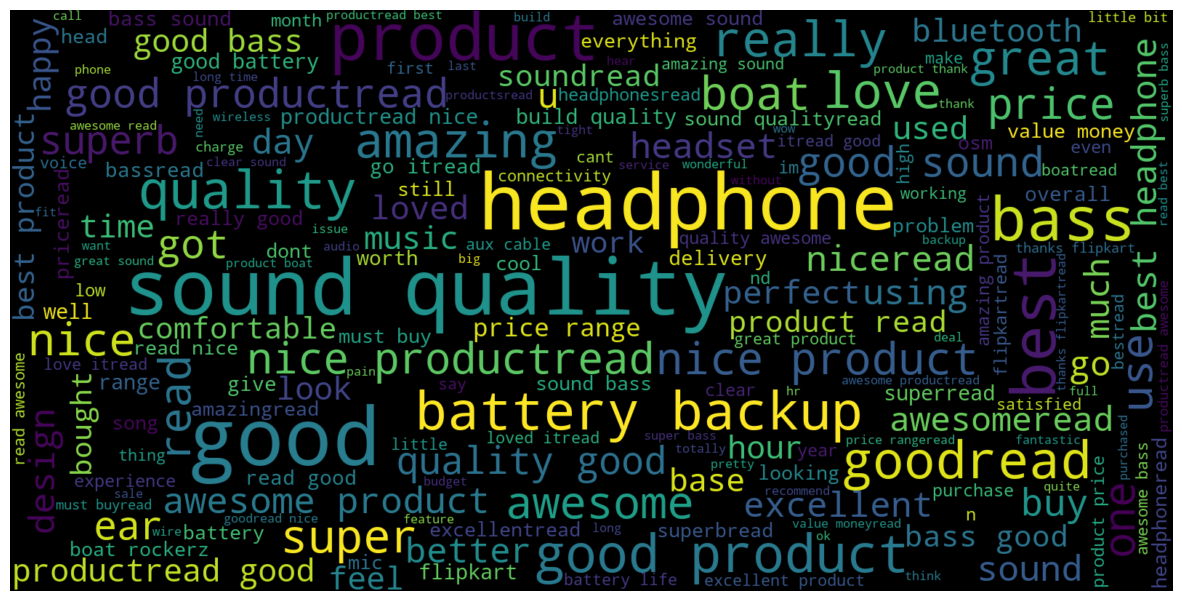

In [13]:
# let’s create the Wordcloud of all the words with label = 1 i.e. positive

consolidated =' '.join(word for word in data['review'][data['label']==1].astype(str))
wordcloud = WordCloud(width=1600 , height=800, random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

### Converting text into Vectors

In [14]:
cv = TfidfVectorizer(max_features=9976)
X = cv.fit_transform(data['review'] ).toarray()

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model training, Evaluation, and Prediction

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,data['label'],test_size=0.3,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
#testing the model
pred = dt.predict(x_train)
print(accuracy_score(y_train,pred))

0.924531003866533


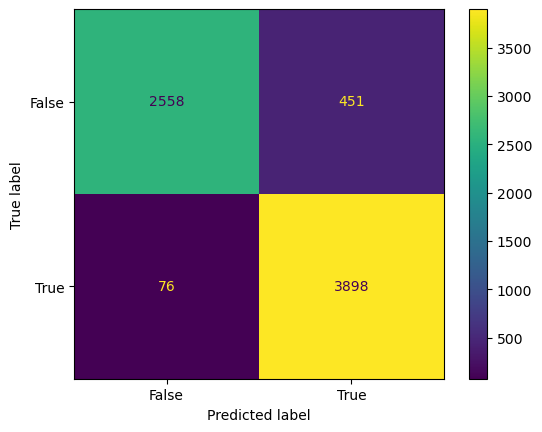

In [20]:
from sklearn import metrics
cm = confusion_matrix(y_train,pred)
cm = metrics.ConfusionMatrixDisplay(cm,display_labels = [False,True])
cm.plot()